### Twitter API

Before making any call to the Twitter API, you need to create and configure your authentication credentials.

These credentials are four text strings: 
  1. Consumer key 
  2. Consumer secret 
  3. Access token 
  4. Access secret

In [152]:
path_credentials = '/Users/admin/Desktop/Ironhack/twitter_credentials.json'

Tweepy is an open source Python package that gives you a very convenient way to access the Twitter API with Python. 

In [154]:
#!pip install tweepy

In [155]:
# Import libraries to work with the Twitter API
import tweepy
import json

### Twitter Authentication

In [156]:
with open(path_credentials) as data_file:
    credentials = json.load(data_file)
    
# Authenticate to Twitter with an OAuthHandler class
auth = tweepy.OAuthHandler(credentials['consumer_key'], credentials['consumer_secret'])
auth.set_access_token(credentials['access_token'], credentials['access_token_secret'])

#The API class has many methods that provide access to Twitter API endpoints. Using these methods, you can access 
#the Twitter API’s functionality.
# Create API class object
api = tweepy.API(auth)

In [157]:
#Testing the credentials:
try:
    api.verify_credentials()
    print("Authentication OK")
except:
    print("Error during authentication")

Authentication OK


### Streaming

From the API methods we will be using the Methods for Streaming. Streaming allows you to actively watch for tweets 
that match certain criteria in real time. This means that when there aren’t any new tweet matching the criteria, then
the program will wait until a new tweet is created and then process it.

The stream object uses the Twitter API to get tweets that match some criteria. This object is the source of tweets 
that are then processed by a stream listener. The stream listener receives tweets from the stream.

In [160]:
consumer_key = credentials['consumer_key']
consumer_secret = credentials['consumer_secret']
access_token = credentials['access_token']
access_token_secret = credentials['access_token_secret']

We will declare a new class, MyStreamListener. By extending Tweepy’s StreamListener, we reused code that is common to 
all stream listeners. Tweets from the stream are processed by on_status().

In [162]:
class MyStreamListener (tweepy.Stream):
    
    #Twitter listener, collects streaming tweets and output to a file
    
    def __init__(self, consumer_key, consumer_secret, access_token, access_token_secret):
        super(MyStreamListener, self).__init__(consumer_key, consumer_secret, access_token, access_token_secret)
        self.consumer_key = consumer_key
        self.consumer_secret = consumer_secret 
        self.access_token = access_token
        self.access_token_secret = access_token_secret
        self.num_tweets = 0
        self.file = open("tweets.txt", "w")


    #def on_data(self, data):
        #tweet = json.loads(data)
        #print(tweet['text'])
        #self.file.write(json.dumps(tweet)+ '\n')
        #self.num_tweets += 1

        #return self.num_tweets < 10
    
    def on_status(self, status):
        tweet = status._json
        #print(tweet['text'])
        self.file.write(json.dumps(tweet)+ '\n')
        self.num_tweets += 1
        if self.num_tweets < 50:
            return True
        else:
            return False
        self.file.close()
        

    def on_error(self, status):
        print(status)

To start getting tweets from the stream, you have to call the stream’s filter(), passing the criteria to use to filter tweets.
Then, for each new tweet that matches the criteria, the stream object invokes the stream listener’s on_status().

In [163]:
stream = MyStreamListener(consumer_key, consumer_secret, access_token, access_token_secret)
stream.filter(track=['adele', 'kamala', 'elon'])

KeyboardInterrupt: 

In [164]:
tweets_data_path='tweets.txt'

tweets_data=[]

tweets_file=open(tweets_data_path,"r")

#read in tweets and store on list
for line in tweets_file:
    tweet=json.loads(line)
    tweets_data.append(tweet)
tweets_file.close()

print(tweets_data[0].keys())


dict_keys(['created_at', 'id', 'id_str', 'text', 'display_text_range', 'source', 'truncated', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'is_quote_status', 'extended_tweet', 'quote_count', 'reply_count', 'retweet_count', 'favorite_count', 'entities', 'favorited', 'retweeted', 'possibly_sensitive', 'filter_level', 'lang', 'timestamp_ms'])


In [165]:
import pandas as pd

# Build DataFrame of tweet texts and languages
df = pd.DataFrame(tweets_data, columns=['text', 'lang'])
df.head()

,text,lang
0,"@VP @SecMartyWalsh ബൈഡന് അനസ്‌തേഷ്യ, ആ ഒന്നരമണ...",und
1,RT @LM_Hype: https://t.co/k3cyJccpRT,und
2,RT @willfulchaos: kamala while joe’s getting h...,en
3,RT @metagalaxyland: The rocket is preparing fo...,en
4,Hurry up there is little left! It is crazy ! T...,en


In [166]:
import re

def word_in_text(word, text):
    word = word.lower()
    text = text.lower()
    match = re.search(word, text)

    if match:
        return True
    return False

In [167]:
# Initialize list to store tweet counts
[adele, kamala, elon] = [0, 0, 0]

# Iterate through df, counting the number of tweets in which each keyword is mentioned
for index, row in df.iterrows():
    adele += word_in_text('adele', row['text'])
    kamala += word_in_text('kamala', row['text'])
    elon += word_in_text('elon', row['text'])

/Users/admin/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


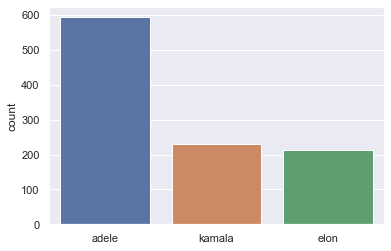

In [168]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set(color_codes=True)

# Create a list of labels:cd
cd = ['adele', 'kamala', 'elon']

# Plot the bar chart
ax = sns.barplot(cd, [adele,kamala, elon])
ax.set(ylabel="count")
plt.show()